In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

* compute_cost

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

* compute_gradient

In [4]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

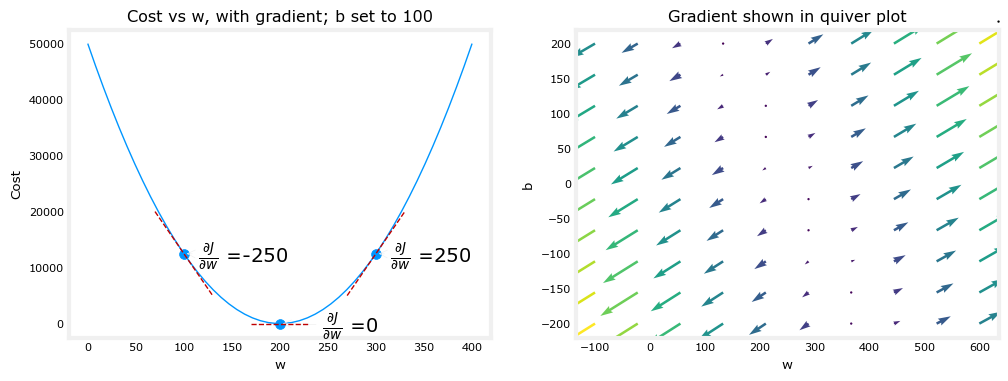

In [5]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

* Gradient Descent

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, compute_gradient):
    j_history = []
    p_history = []
    
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        #calculate the gradient function
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        #save cost J and the values of w, b at each iteration
        
        if i<100000:  #to prevent resource exhaustion
            j_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        #print cost every at intervals 10 times or as many iterations if < 10
        
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e}", 
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                  f"w: {w:0.3e}, b: {b:0.5e}")

    return w, b, j_history, p_history            

In [7]:
w_init = 0
b_init = 0

iterations = 100000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w, b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")



Iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 6.500e+00, b: 4.00000e+00
Iteration 10000: Cost 6.74e-06 dj_dw: -5.215e-04, dj_db:  8.439e-04 w: 2.000e+02, b: 1.00012e+02
Iteration 20000: Cost 3.09e-12 dj_dw: -3.532e-07, dj_db:  5.714e-07 w: 2.000e+02, b: 1.00000e+02
Iteration 30000: Cost 1.42e-18 dj_dw: -2.393e-10, dj_db:  3.869e-10 w: 2.000e+02, b: 1.00000e+02
Iteration 40000: Cost 1.26e-23 dj_dw: -1.421e-12, dj_db:  7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration 50000: Cost 1.26e-23 dj_dw: -1.421e-12, dj_db:  7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration 60000: Cost 1.26e-23 dj_dw: -1.421e-12, dj_db:  7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration 70000: Cost 1.26e-23 dj_dw: -1.421e-12, dj_db:  7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration 80000: Cost 1.26e-23 dj_dw: -1.421e-12, dj_db:  7.105e-13 w: 2.000e+02, b: 1.00000e+02
Iteration 90000: Cost 1.26e-23 dj_dw: -1.421e-12, dj_db:  7.105e-13 w: 2.000e+02, b: 1.00000e+02
(w, b) found by gradient descen

In [8]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


* Cost versus Learning Rate

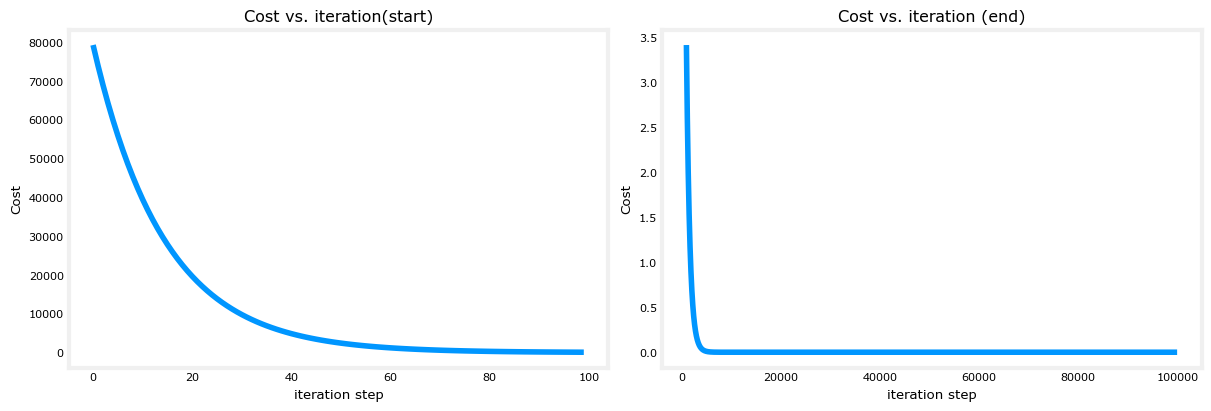

In [9]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

- Plotting

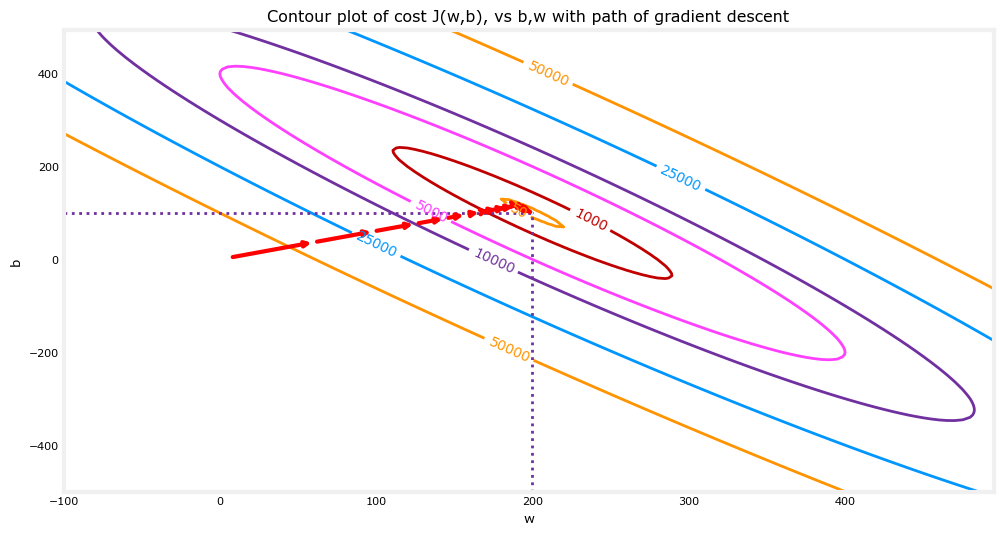

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

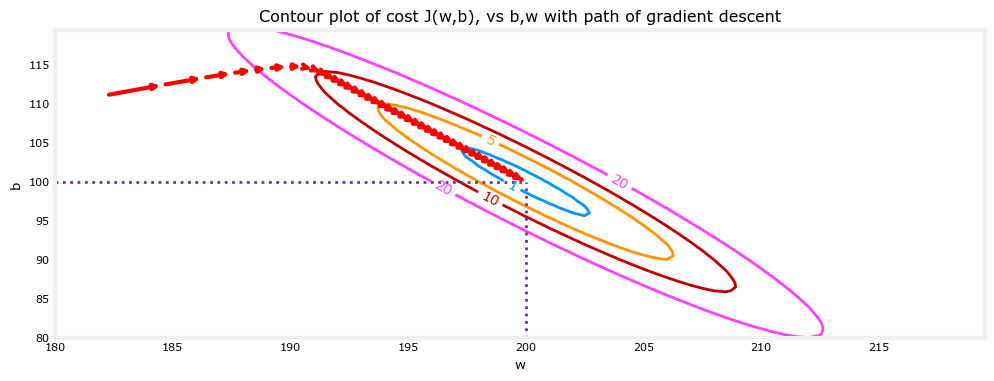

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

* Increased Learning Rate

In [12]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

print(f"(w, b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")


Iteration    0: Cost 2.58e+05 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05 dj_dw:  1.130e+03, dj_db:  7.000e+02 w: -3.840e+02, b: -2.40000e+02
Iteration    2: Cost 2.37e+06 dj_dw: -1.970e+03, dj_db: -1.216e+03 w: 1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06 dj_dw:  3.429e+03, dj_db:  2.121e+03 w: -1.551e+03, b: -9.63840e+02
Iteration    4: Cost 2.18e+07 dj_dw: -5.974e+03, dj_db: -3.691e+03 w: 3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07 dj_dw:  1.040e+04, dj_db:  6.431e+03 w: -5.095e+03, b: -3.15579e+03
Iteration    6: Cost 2.01e+08 dj_dw: -1.812e+04, dj_db: -1.120e+04 w: 9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08 dj_dw:  3.156e+04, dj_db:  1.950e+04 w: -1.584e+04, b: -9.80139e+03
Iteration    8: Cost 1.85e+09 dj_dw: -5.496e+04, dj_db: -3.397e+04 w: 2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09 dj_dw:  9.572e+04, dj_db:  5.916e+04 w: -4.845e+04, b: -2.99567e+04
(w, b) found by gradient desce

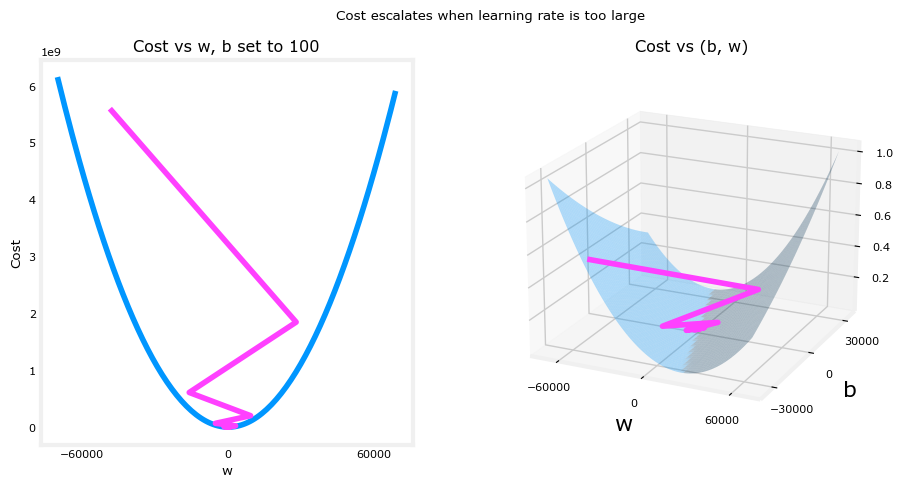

In [13]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()